In [44]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r"C:\Users\Olegi Megi\Desktop\Data Analyst\Projects\Students Test score\StudentsPerformance.csv"
df = pd.read_csv(path)
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

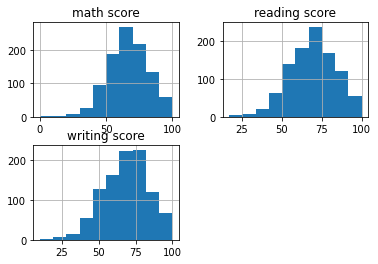

In [6]:
df.hist()

In [7]:
# checking for missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().value_counts()

False    1000
dtype: int64

In [9]:
gs = df["race/ethnicity"].value_counts().reset_index(name="count")
print(gs)

     index  count
0  group C    319
1  group D    262
2  group B    190
3  group E    140
4  group A     89


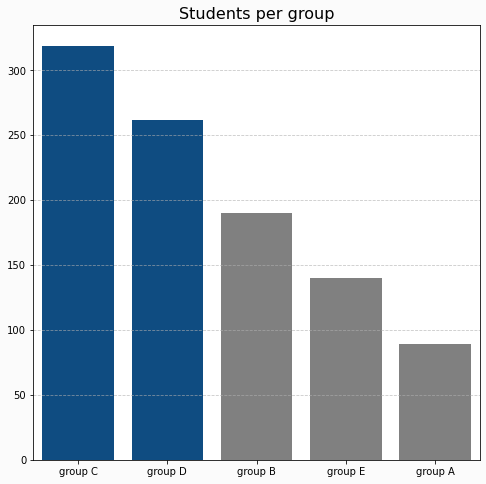

In [10]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor("#fbfbfb")

plot = sns.barplot(x="index", y="count", data=gs, color="grey")

for i in range(2):
    plot.patches[i].set_facecolor("#0f4c81")

plt.title("Students per group", fontsize=16)
plt.ylabel("")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Gender distribution 

In [11]:
print(df["gender"].value_counts())

female    518
male      482
Name: gender, dtype: int64


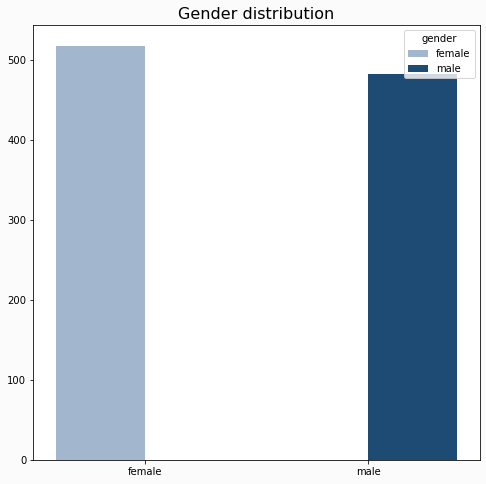

In [12]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor("#fbfbfb")

colors = {"male": "#0f4c81", "female": "#9bb7d4"}
palette = {key: colors[key] for key in colors.keys()}

sns.countplot(x="gender", data=df, hue="gender", palette=palette)

plt.title("Gender distribution", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [13]:
gdbg = df[["gender", "race/ethnicity"]].value_counts().reset_index(name="count")
print(gdbg)

   gender race/ethnicity  count
0  female        group C    180
1    male        group C    139
2    male        group D    133
3  female        group D    129
4  female        group B    104
5    male        group B     86
6    male        group E     71
7  female        group E     69
8    male        group A     53
9  female        group A     36


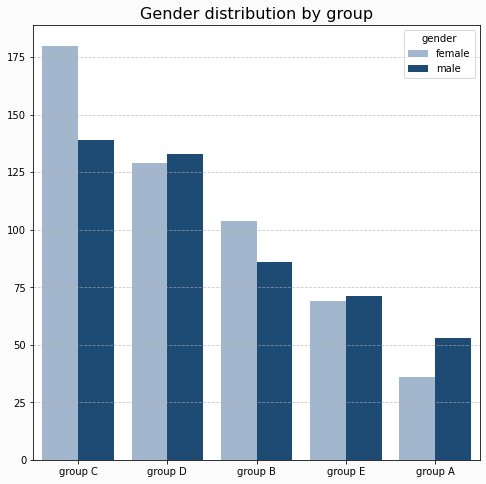

In [14]:
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor("#fbfbfb")
colors = {"male": "#0f4c81", "female": "#9bb7d4"}

sns.barplot(x="race/ethnicity", y="count", hue="gender", data=gdbg, palette=colors)


plt.title("Gender distribution by group", fontsize=16)
plt.ylabel("")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Score distribution

In [15]:
scores = df[["math score","reading score", "writing score"]]
print(scores)

     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


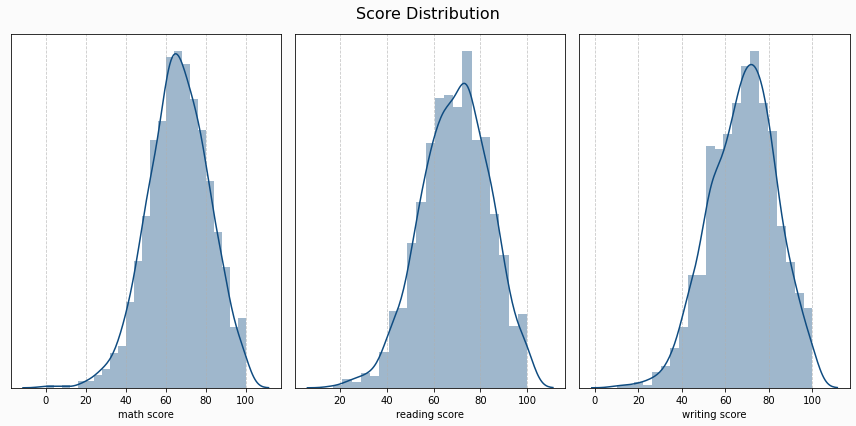

In [16]:
fig, ax = plt.subplots(1,3, figsize=(12,6), facecolor="#fbfbfb")

sns.distplot(scores["math score"],  color="#0f4c81", label="math score", ax=ax[0])
sns.distplot(scores["reading score"], color="#0f4c81", label="reading score", ax=ax[1])
sns.distplot(scores["writing score"], color="#0f4c81", label="writing score", ax=ax[2])

# add gridlines
for axis in ax:
    axis.grid(True, linestyle="--", alpha=0.7)

plt.suptitle("Score Distribution", fontsize=(16))    
plt.setp(ax, yticks=[], ylabel=(""))
plt.tight_layout()

plt.show()

In [17]:
msbs = df[["race/ethnicity","math score", "reading score", "writing score"]]
msbs = msbs.groupby("race/ethnicity").mean().reset_index()
print(msbs)

  race/ethnicity  math score  reading score  writing score
0        group A   61.629213      64.674157      62.674157
1        group B   63.452632      67.352632      65.600000
2        group C   64.463950      69.103448      67.827586
3        group D   67.362595      70.030534      70.145038
4        group E   73.821429      73.028571      71.407143


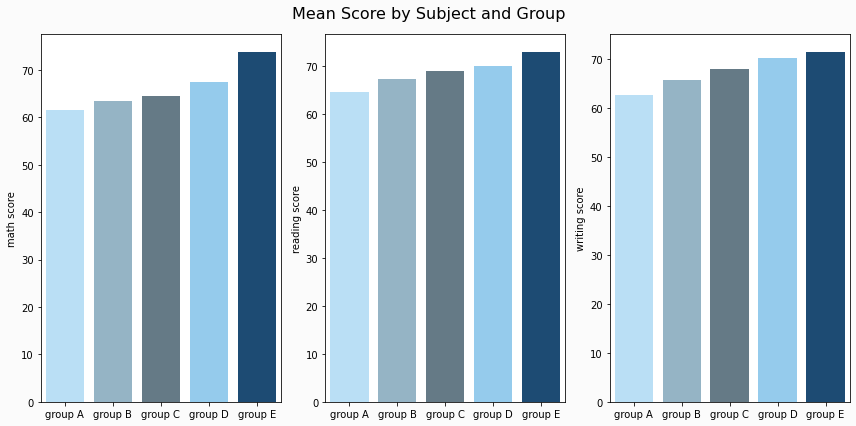

In [18]:
fig, ax = plt.subplots(1,3,figsize=(12,6), facecolor="#fbfbfb")
colors = {"group A": "#B0E2FF", "group B": "#8DB6CD", "group C": "#607B8B", "group D": "#87CEFA", "group E": "#0f4c81"}   
palette = list(colors.values())

sns.barplot(x="race/ethnicity", y="math score", data=msbs, palette=palette, ax=ax[0])
sns.barplot(x="race/ethnicity", y="reading score", data=msbs, palette=palette, ax=ax[1])
sns.barplot(x="race/ethnicity", y="writing score", data=msbs, palette=palette, ax=ax[2])

plt.suptitle("Mean Score by Subject and Group", fontsize=(16))

for axes in ax:
    axes.set_xlabel("")
plt.tight_layout()

# Is there a correlation between Preparation and overall Score?

In [19]:
overall_score = (df["math score"] + df["reading score"] + df["writing score"]) / 3 
print(overall_score)

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64


In [20]:
df["overall score"] = overall_score
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


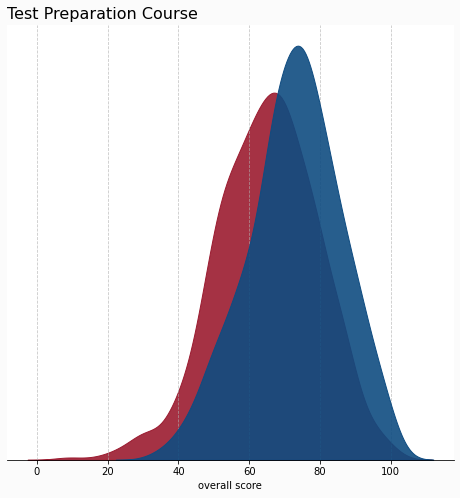

In [21]:
fig = plt.figure(figsize=(8,8), facecolor="#fbfbfb")

preparations = df[df["test preparation course"]=="completed"]
no_preparations = df[df["test preparation course"]=="none"]

sns.kdeplot(preparations["overall score"], color="#0f4c81", label="Overall score with Preparation",
            shade=True, alpha=0.9, zorder=2)
sns.kdeplot(no_preparations["overall score"], color="#9b1b30", label="Overall score without Preparation",
           shade=True, alpha=0.9, zorder=1)


plt.title("Test Preparation Course",loc="left",  fontsize=16)
plt.yticks([])
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)

sns.despine(top=True, right=True, left=True)

plt.show()

# Is there any correlation between Gender and overall Score?

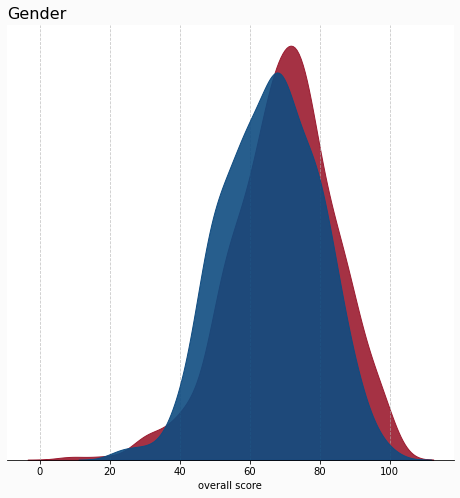

In [22]:
fig = plt.figure(figsize=(8,8), facecolor="#fbfbfb")

gender_m = df[df["gender"]=="male"]
gender_f = df[df["gender"]=="female"]

sns.kdeplot(gender_m["overall score"], color="#0f4c81", label="Male", shade=True, alpha=0.9, zorder=2)
sns.kdeplot(gender_f["overall score"], color="#9b1b30", label="Female", shade=True, alpha=0.9, zorder=1)

plt.title("Gender",loc="left",  fontsize=16)
plt.yticks([])
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)

sns.despine(top=True, right=True, left=True)

plt.show()

# Is there any correlation between standard and free/reduced lunch? 

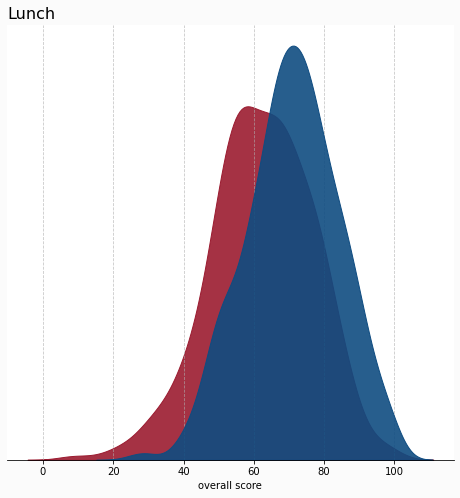

In [23]:
fig = plt.figure(figsize=(8,8), facecolor="#fbfbfb")

standard_lunch = df[df["lunch"]=="standard"]
free_reduced_lunch = df[df["lunch"]=="free/reduced"]

sns.kdeplot(standard_lunch["overall score"], color="#0f4c81", label="Standard", shade=True, alpha=0.9,
            zorder=2)
sns.kdeplot(free_reduced_lunch["overall score"], color="#9b1b30", label="Free/Reduced", shade=True,
            alpha=0.9, zorder=1)

plt.title("Lunch",loc="left",  fontsize=16)
plt.yticks([])
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)

sns.despine(top=True, right=True, left=True)

plt.show()

# Is there any correlation between parent level of education and overall score?

In [24]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

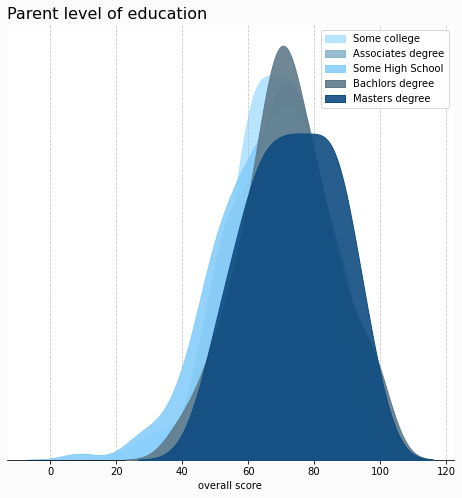

In [25]:
fig = plt.figure(figsize=(8,8), facecolor="#fbfbfb")

sc = df[df["parental level of education"]=="some college"]
ad = df[df["parental level of education"]== "associate's degree"]
shs = df[df["parental level of education"]== "some high school"]
BA = df[df["parental level of education"]== "bachelor's degree"]
MBA = df[df["parental level of education"]== "master's degree"]

sns.kdeplot(x=sc["overall score"], color="#B0E2FF", label="Some college", shade=True, alpha = 0.9, zorder=0)
sns.kdeplot(x=ad["overall score"], color="#8DB6CD", label="Associates degree", shade=True, alpha = 0.9, zorder=1)
sns.kdeplot(x=shs["overall score"], color="#87CEFA", label="Some High School", shade=True, alpha = 0.9, zorder=2)
sns.kdeplot(x=BA["overall score"], color="#607B8B", label="Bachlors degree", shade=True, alpha = 0.9, zorder=3)
sns.kdeplot(x=MBA["overall score"], color="#0f4c81", label="Masters degree", shade=True, alpha = 0.9, zorder=4)

plt.title("Parent level of education",loc="left",  fontsize=16)
plt.yticks([])
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend()

sns.despine(top=True, right=True, left=True)

plt.show()

Text(155, 0.02, '\nHere i tried to show the previous plots in one single Visualization. \nI got the Inspiration form Josh (link: "https://www.kaggle.com/joshuaswords")\n')

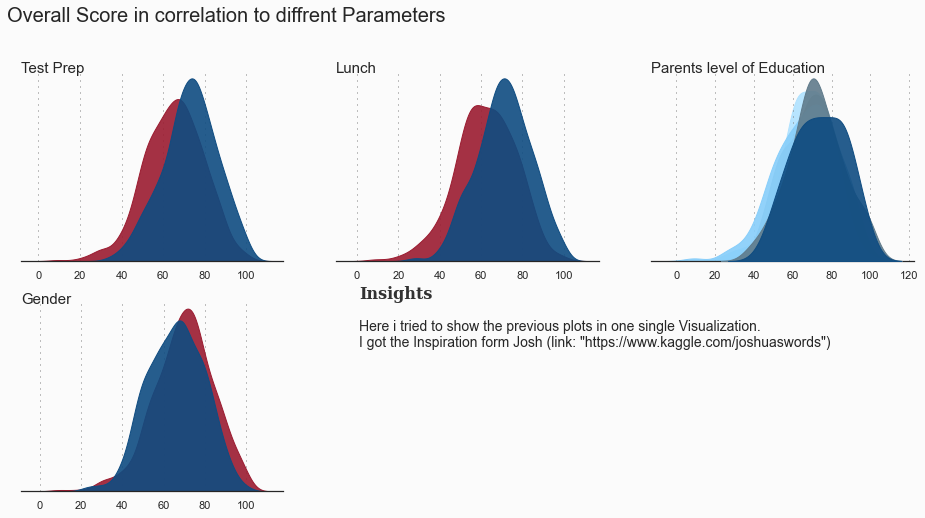

In [39]:
background="#fbfbfb"

fig = plt.figure(figsize=(16,12), facecolor=background)
gs = gridspec.GridSpec(3,3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])

ax0.set_facecolor(background)
ax1.set_facecolor(background)
ax2.set_facecolor(background)
ax3.set_facecolor(background)


# test prep
sns.kdeplot(preparations["overall score"], color="#0f4c81", label="Overall score with Preparation", ax=ax0,
            shade=True, alpha=0.9, zorder=2)
sns.kdeplot(no_preparations["overall score"], color="#9b1b30", label="Overall score without Preparation", 
           ax=ax0, shade=True, alpha=0.9, zorder=1)

# lunches 
sns.kdeplot(standard_lunch["overall score"], color="#0f4c81", label="Standard", ax=ax1,
            shade=True, alpha=0.9, zorder=2)
sns.kdeplot(free_reduced_lunch["overall score"], color="#9b1b30", label="Free/Reduced",ax=ax1, shade=True,
            alpha=0.9, zorder=1)

# parents level of education
sns.kdeplot(x=sc["overall score"], color="#B0E2FF", label="Some college",
            ax=ax2, shade=True, alpha = 0.9, zorder=0)
sns.kdeplot(x=ad["overall score"], color="#8DB6CD", label="Associates degree",
            ax=ax2, shade=True, alpha = 0.9, zorder=1)
sns.kdeplot(x=shs["overall score"], color="#87CEFA", label="Some High School",
            ax=ax2, shade=True, alpha = 0.9, zorder=2)
sns.kdeplot(x=BA["overall score"], color="#607B8B", label="Bachlors degree",
            ax=ax2, shade=True, alpha = 0.9, zorder=3)
sns.kdeplot(x=MBA["overall score"], color="#0f4c81", label="Masters degree",
            ax=ax2, shade=True, alpha = 0.9, zorder=4)

# gender
sns.kdeplot(gender_m["overall score"], color="#0f4c81", label="Male",ax=ax3,
            shade=True, alpha=0.9, zorder=2)
sns.kdeplot(gender_f["overall score"], color="#9b1b30", label="Female",ax=ax3, 
            shade=True, alpha=0.9, zorder=1)

# set yticks
ax0.set(yticks=[])
ax1.set(yticks=[])
ax2.set(yticks=[])
ax3.set(yticks=[])

# despine plots
for s in ["top", "left", "right"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)

# set x and y label
ax0.set_ylabel("")
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax0.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")

# add grid
ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax2.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax3.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))

# set title
ax0.set_title("Test Prep", loc="left", fontsize=15, y=0.95)
ax1.set_title("Lunch", loc="left", fontsize=15, y=0.95)
ax2.set_title("Parents level of Education", loc="left", fontsize=15, y=0.95)
ax3.set_title("Gender", loc="left", fontsize=15, y=0.95)

ax0.text(-15,0.04, "Overall Score in correlation to diffrent Parameters", fontsize=20)

ax3.text(155, 0.03, 'Insights', 
         fontsize=16, fontweight='bold', fontfamily='serif', color="#323232")
ax3.text(155,0.02, 
'''
Here i tried to show the previous plots in one single Visualization. 
I got the Inspiration form Josh (link: "https://www.kaggle.com/joshuaswords")
''', fontsize=14)

# Overall mean score

[]

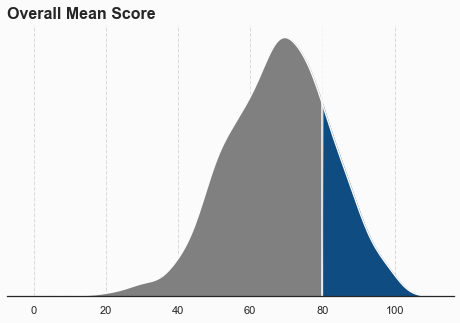

In [110]:
fig = plt.figure(figsize=(8,5), facecolor=background)
gs = fig.add_gridspec(1, 1)
gs.update()

x0 = 80
x1 = 120 

ax = sns.kdeplot(df["overall score"],color=background)
ax.set_facecolor(background)
kde_x, kde_y = ax.lines[0].get_data()

p1 = plt.axvline(x=x0, color=background)

ax.fill_between(kde_x, kde_y, where=(kde_x>x0) & (kde_x<x1), interpolate=True, color='#0f4c81')
ax.fill_between(kde_x, kde_y, where=(kde_x<x0) & (kde_x>0), interpolate=True, color='gray')

for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

ax.grid(linestyle="--", alpha=0.7)
    
ax.set_title("Overall Mean Score", loc="left",fontweight="bold", fontsize=16)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])